In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"Restaurant_dataset.csv")
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac۱,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,stanbul,"Cafeaa Mahallesi, Bademalt۱ Sokak, No 21/B, Ka...",Moda,"Moda, stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### **Check for missing values in each column and handle them accordingly.**


In [4]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

**Filling the Null values**
- filling missing values with fillna()
- Categorical columns (dtypes='object') is replaced with mode values of thier respective columns
- Numerical columns (dtypes!='object') is replaced with median values of thier respective columns

In [5]:
import warnings
warnings.filterwarnings('ignore')
for i in data:
    if data[i].dtype=='object':
        mode=data[i].mode()[0]
        data[i].fillna(mode,inplace=True)
    else:
        median=data[i].median
        data[i].fillna(median,inplace=True)
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### **Unique values of each columns**

In [6]:
for i in data:
    unique=data[i].unique()
    print(f"{i} column has {len(unique)} values")

Restaurant ID column has 9551 values
Restaurant Name column has 7446 values
Country Code column has 15 values
City column has 141 values
Address column has 8918 values
Locality column has 1208 values
Locality Verbose column has 1265 values
Longitude column has 8120 values
Latitude column has 8677 values
Cuisines column has 1825 values
Average Cost for two column has 140 values
Currency column has 12 values
Has Table booking column has 2 values
Has Online delivery column has 2 values
Is delivering now column has 2 values
Switch to order menu column has 1 values
Price range column has 4 values
Aggregate rating column has 33 values
Rating color column has 6 values
Rating text column has 6 values
Votes column has 1012 values


### **Dropping the ID,Unique,unwanted,redundant columns:**
- **Restaurant ID** can be remove because it is an ID column
- **Resturant Name** can be remove because it is mostly a unique column
- **Address** column can be removed because of too large address ,we can use city instead
- **Longitude,Latitude** column can be removed because of large numerical values, wecan use city instead
- **Locality,Locality Verbose** columns can be removed ,we can use city instead
- **Switch to order menu`** can be removed because it has only one unique value Throughout the dataset
- **Is delivering now** can be removed because we can use Has Online delivery instead because they are highly correlated

In [7]:
l=data['Has Online delivery']
m=data['Is delivering now']
len(list(np.where(l==m)[0]))/len(data)

0.7469374934561825

In [8]:
l=['Restaurant ID','Restaurant Name','Address','Longitude','Latitude','Locality','Locality Verbose','Switch to order menu','Is delivering now']
data=data.drop(l,axis=1)
data.head()

,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,314
1,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,591
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,270
3,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,4,4.9,Dark Green,Excellent,365
4,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,4,4.8,Dark Green,Excellent,229


### Splitting the data into input and output 

In [9]:
X=data.drop('Aggregate rating',axis=1)
y=data['Aggregate rating']
print(y)
X.head()

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64


,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Rating color,Rating text,Votes
0,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,Dark Green,Excellent,314
1,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,3,Dark Green,Excellent,591
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,Green,Very Good,270
3,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,4,Dark Green,Excellent,365
4,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,4,Dark Green,Excellent,229


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country Code          9551 non-null   int64 
 1   City                  9551 non-null   object
 2   Cuisines              9551 non-null   object
 3   Average Cost for two  9551 non-null   int64 
 4   Currency              9551 non-null   object
 5   Has Table booking     9551 non-null   object
 6   Has Online delivery   9551 non-null   object
 7   Price range           9551 non-null   int64 
 8   Rating color          9551 non-null   object
 9   Rating text           9551 non-null   object
 10  Votes                 9551 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 820.9+ KB


In [11]:
X['Country Code']=X['Country Code'].astype('str')
X['Price range']=X['Price range'].astype('str')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country Code          9551 non-null   object
 1   City                  9551 non-null   object
 2   Cuisines              9551 non-null   object
 3   Average Cost for two  9551 non-null   int64 
 4   Currency              9551 non-null   object
 5   Has Table booking     9551 non-null   object
 6   Has Online delivery   9551 non-null   object
 7   Price range           9551 non-null   object
 8   Rating color          9551 non-null   object
 9   Rating text           9551 non-null   object
 10  Votes                 9551 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 820.9+ KB


In [12]:
cat=X.select_dtypes(include='object').columns
num=X.select_dtypes(exclude='object').columns
cat,num

(Index(['Country Code', 'City', 'Cuisines', 'Currency', 'Has Table booking',
        'Has Online delivery', 'Price range', 'Rating color', 'Rating text'],
       dtype='object'),
 Index(['Average Cost for two', 'Votes'], dtype='object'))

## **Categorical column Analysis**

################### Country Code DataFrame ###############################
   Country Code  count
0           162     22
1            30     60
2           216    434
3            14     24
4            37      4
5           184     20
6           214     60
7             1   8652
8            94     21
9           148     40
10          215     80
11          166     20
12          189     60
13          191     20
14          208     34
################### City DataFrame ###############################
                 City  count
0         Makati City      2
1    Mandaluyong City      4
2          Pasay City      3
3          Pasig City      3
4         Quezon City      1
..                ...    ...
136          Randburg      1
137           Sandton     11
138           Colombo     20
139            Ankara     20
140           stanbul     14

[141 rows x 2 columns]
################### Currency DataFrame ###############################
                  Currency  count
0         Bot

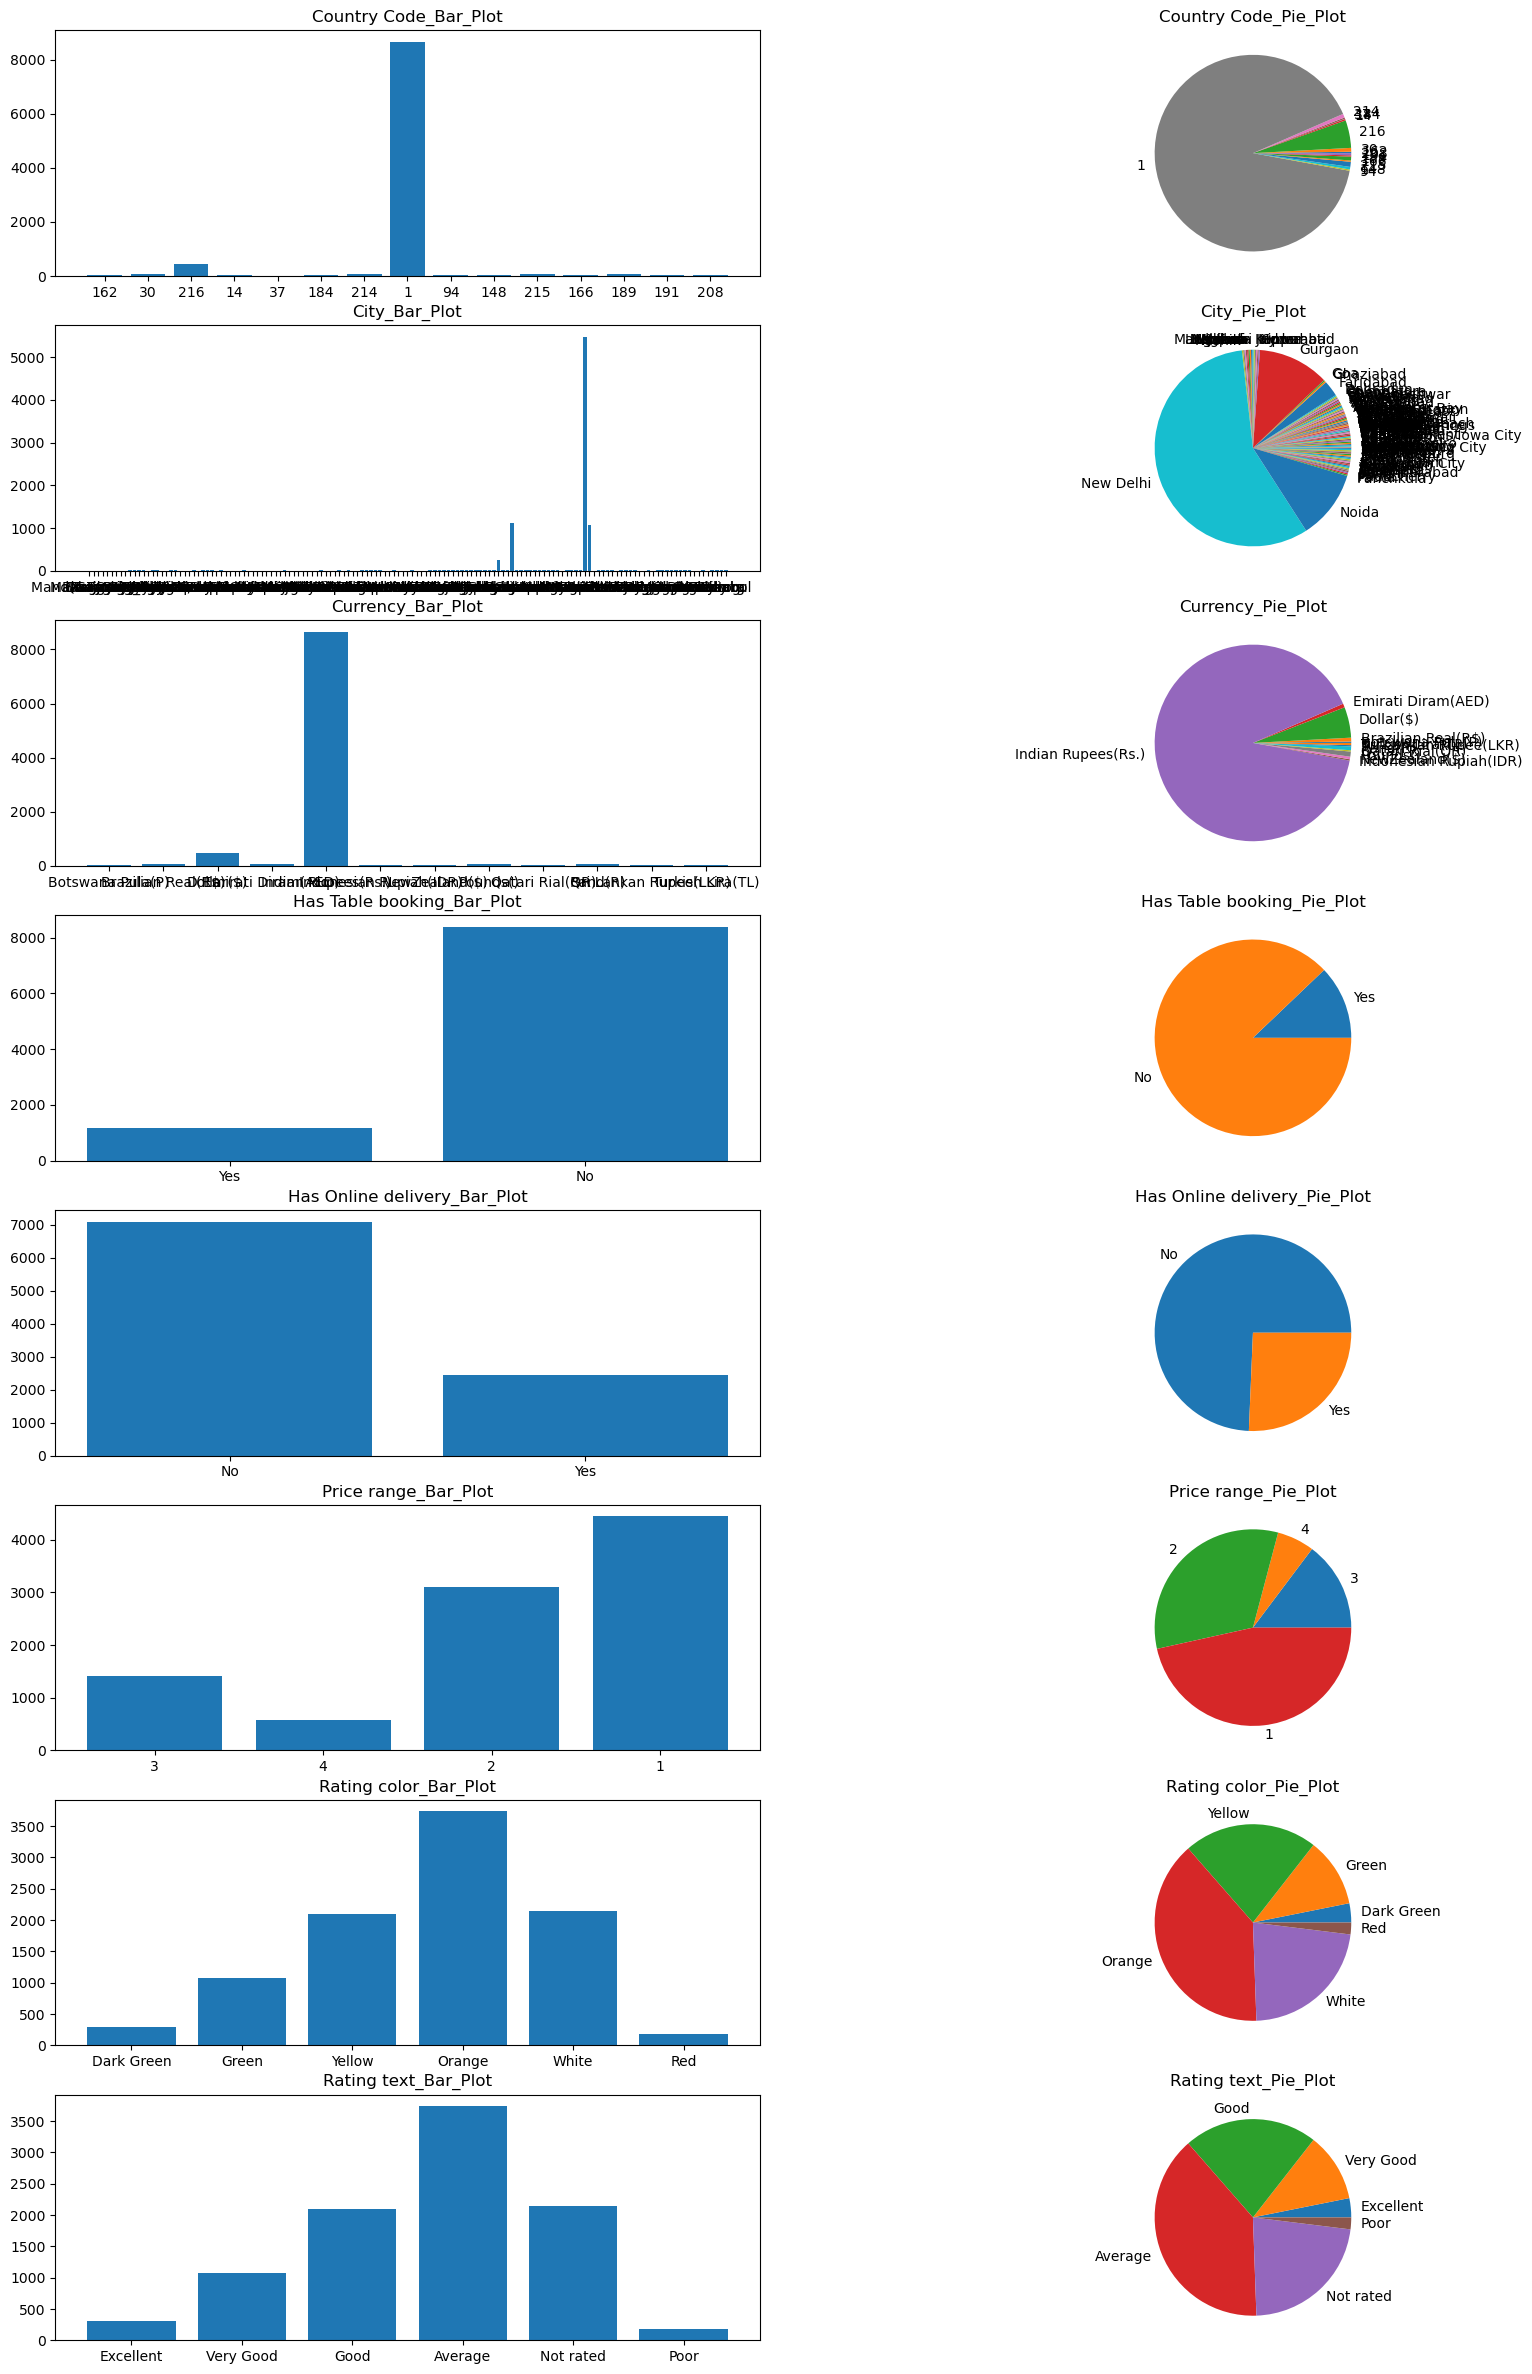

In [13]:
temp_cat=list(cat)
temp_cat.remove('Cuisines')
k=1
plt.figure(figsize=(20,30))
for i in temp_cat:
    unique=X[i].unique()
    count=[]
    print(f'################### {i} DataFrame ###############################')
    for j in unique:
        cond=X[i]==j
        count.append(len(data[cond]))
    df=pd.DataFrame(zip(unique,count),columns=[f'{i}','count'])
    print(df)
    plt.subplot(len(temp_cat),2,k).bar(unique,count)
    plt.title(f'{i}_Bar_Plot')
    k+=1
    plt.subplot(len(temp_cat),2,k).pie(count,labels=unique)
    plt.title(f'{i}_Pie_Plot')
    k+=1

 

#### Unique values in categorical columns

In [14]:
for i in temp_cat:
    print(f'{i}:{X[i].unique()}')

Country Code:['162' '30' '216' '14' '37' '184' '214' '1' '94' '148' '215' '166' '189'
 '191' '208']
City:['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras_lia'
 'Rio de Janeiro' 'So Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Valdosta' 'Vernonia' 'Victor Harbor' 'Vineland 

In [15]:
p=[]
for i in X['Cuisines']:
    p.extend(i.split(', '))
    p=list(set(p))
p

['South Indian',
 'Bihari',
 'Andhra',
 'Chinese',
 'Seafood',
 'Rajasthani',
 'Cuisine Varies',
 'Street Food',
 'Vegetarian',
 'Cuban',
 'Mineira',
 'Continental',
 'Healthy Food',
 'Southern',
 'Indonesian',
 'Latin American',
 'Tea',
 'Sri Lankan',
 'Deli',
 'Korean',
 'French',
 'Taiwanese',
 'World Cuisine',
 'Mediterranean',
 'International',
 'Mughlai',
 'D_ner',
 'German',
 'Burmese',
 'Ramen',
 'Lebanese',
 'Breakfast',
 'Mexican',
 'Diner',
 'Teriyaki',
 'Middle Eastern',
 'Steak',
 'Modern Australian',
 'Curry',
 'Southwestern',
 'Vietnamese',
 'Nepalese',
 'Sandwich',
 'Turkish',
 'British',
 'Iranian',
 'Fish and Chips',
 'Biryani',
 'Ice Cream',
 'Mangalorean',
 'Scottish',
 'Bakery',
 'Beverages',
 'Armenian',
 'Argentine',
 'Kerala',
 'Lucknowi',
 'Salad',
 'Indian',
 'Spanish',
 'Asian',
 'Malwani',
 'Chettinad',
 'Sushi',
 'American',
 'Brazilian',
 'Modern Indian',
 'Bubble Tea',
 'Western',
 'Pakistani',
 'Oriya',
 'BBQ',
 'Finger Food',
 'Tapas',
 'Tibetan',
 'Par

### **Numerical Column Analysis**

In [16]:
d={}
index=[]
temp=[]
for i in num:
    mean=round(X[i].mean(),2)
    median=round(X[i].median(),2)
    mode=X[i].mode()[0]
    sd=round(X[i].std(),2)
    temp=[mean,median,mode,sd]
    index=['Mean','Median','Mode','SD']
    #columns.append(i)
    d[i]=temp
pd.DataFrame(d,index=index)

,Average Cost for two,Votes
Mean,1199.21,156.91
Median,400.00,31.00
Mode,500.00,0.00
SD,16121.18,430.17


### **Encoding the Categorical columns and Scaling (Normalizing) the Numerical columns**
- Applying Normal encoding for all categorical columns except 'Cuisines'
- Applying MultiLabelBinarizer for 'Cuisines' column because 'Cuisines' columns consist of multiple values


In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
# Step 1: Multi-Label Encoding for "Cuisines"
X['Cuisines'] = X['Cuisines'].str.split(', ')  # Convert string to list
mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(X['Cuisines']), columns=mlb.classes_)
X=X.drop('Cuisines', axis=1).join(cuisine_encoded)  # Merge encoded cuisines
# Step 2: Encoding Other Categorical Columns
for i in temp_cat:
    d={}
    k=0
    unique=X[i].unique()
    for j in unique:
        d[j]=k
        k+=1
    print(d)
    X[i]=X[i].map(d)
        
cuisine_encoded

{'162': 0, '30': 1, '216': 2, '14': 3, '37': 4, '184': 5, '214': 6, '1': 7, '94': 8, '148': 9, '215': 10, '166': 11, '189': 12, '191': 13, '208': 14}
{'Makati City': 0, 'Mandaluyong City': 1, 'Pasay City': 2, 'Pasig City': 3, 'Quezon City': 4, 'San Juan City': 5, 'Santa Rosa': 6, 'Tagaytay City': 7, 'Taguig City': 8, 'Bras_lia': 9, 'Rio de Janeiro': 10, 'So Paulo': 11, 'Albany': 12, 'Armidale': 13, 'Athens': 14, 'Augusta': 15, 'Balingup': 16, 'Beechworth': 17, 'Boise': 18, 'Cedar Rapids/Iowa City': 19, 'Chatham-Kent': 20, 'Clatskanie': 21, 'Cochrane': 22, 'Columbus': 23, 'Consort': 24, 'Dalton': 25, 'Davenport': 26, 'Des Moines': 27, 'Dicky Beach': 28, 'Dubuque': 29, 'East Ballina': 30, 'Fernley': 31, 'Flaxton': 32, 'Forrest': 33, 'Gainesville': 34, 'Hepburn Springs': 35, 'Huskisson': 36, 'Inverloch': 37, 'Lakes Entrance': 38, 'Lakeview': 39, 'Lincoln': 40, 'Lorn': 41, 'Macedon': 42, 'Macon': 43, 'Mayfield': 44, 'Mc Millan': 45, 'Middleton Beach': 46, 'Miller': 47, 'Monroe': 48, 'Montv

,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,Asian,Asian Fusion,Assamese,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Scaling 
for i in num:
    mean=X[i].mean()
    sd=X[i].std()
    new=[]
    for j in X[i]:
        z=((j-mean)/sd)
        new.append(z)
    X[i]=new
X.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Rating color,Rating text,Votes,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,0,0,-0.006154,0,0,0,0,0,0,0.365183,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.000049,0,0,0,0,0,0,1.009115,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0.173733,0,0,0,1,1,1,0.262897,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0.018658,0,1,0,1,0,0,0.483741,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0.018658,0,0,0,1,0,0,0.167586,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for i in data:
    print(i)

Country Code
City
Cuisines
Average Cost for two
Currency
Has Table booking
Has Online delivery
Price range
Aggregate rating
Rating color
Rating text
Votes


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7640, 155), (1911, 155), (7640,), (1911,))

### **Linear Regression Model**

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test)
y_pred

array([-0.26065949,  4.85214252,  2.29547989, ...,  2.4512834 ,
        4.51398232,  4.25399615])

In [24]:
print('############## Linear regression Model ####################')
pd.DataFrame(zip(y_test,y_pred),columns=['Actual Rating','Predicted Rating'])

############## Linear regression Model ####################


,Actual Rating,Predicted Rating
0,2.1,-0.260659
1,4.1,4.852143
2,3.2,2.295480
3,4.4,5.031804
4,3.5,3.426871
...,...,...
1906,2.6,2.429595
1907,0.0,0.948352
1908,3.1,2.451283
1909,4.2,4.513982


In [25]:
mse=np.square(np.sum(y_test-y_pred))/len(y_test)
mse

4.27914014286864e+16

In [26]:
comparision={}
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
mse=round(mean_squared_error(y_test,y_pred),2)
rmse=round(root_mean_squared_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),2)
comparision['LR_Model']=[mse,rmse,r2]
print(f'Mean Square Error is {mse} using Linear Regression model ')
print(f'Root Mean Square Error is {rmse} using Linear Regression model ')
print(f'R2 score is {r2} using Linear Regression model ')

Mean Square Error is 4.279145152392966e+16 using Linear Regression model 
Root Mean Square Error is 206860947.31 using Linear Regression model 
R2 score is -1.8800264708814004e+16 using Linear Regression model 


- **MSE=4.27x10^16**(extremely large error) means model's predictions outputs are far from the actual output values
- **R²=-1.88x10^16** means the model is performing worse than a simple mean model
- we can conclude that **Linear Regression Model's performance is very poor**

### **Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [28]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred=dt.predict(X_test)
print('############## Decision Tree Model ####################')
pd.DataFrame(zip(y_test,y_pred),columns=['Actual Rating','Predicted Rating'])

############## Decision Tree Model ####################


,Actual Rating,Predicted Rating
0,2.1,2.3
1,4.1,4.2
2,3.2,2.8
3,4.4,4.0
4,3.5,3.5
...,...,...
1906,2.6,2.7
1907,0.0,0.0
1908,3.1,3.0
1909,4.2,4.2


In [30]:
from sklearn.metrics import mean_squared_error,r2_score
mse=round(mean_squared_error(y_test,y_pred),2)
rmse=round(root_mean_squared_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),2)
comparision['DT_Model']=[mse,rmse,r2]
print(f'Mean Square Error is {mse} using Decision Tree model ')
print(f'Root Mean Square Error is {rmse} using Decision Tree model ')
print(f'R2 score is {r2} using Decision Tree model ')

Mean Square Error is 0.06 using Decision Tree model 
Root Mean Square Error is 0.24 using Decision Tree model 
R2 score is 0.97 using Decision Tree model 


- **As MSE=0.0573**(very low error) means model's predictions outputs are closer to the actual output values
- **R²=0.9748** means the model explains 97.48% of the testing data
- So,**Decision Tree Regression model performance is Excellent**

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [32]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_pred=rf.predict(X_test)
y_pred

array([2.336     , 4.136     , 2.89855238, ..., 2.98481667, 4.197     ,
       4.144     ])

In [34]:
print('############## Random Forest Model ####################')
pd.DataFrame(zip(y_test,y_pred),columns=['Actual Rating','Predicted Rating'])

############## Random Forest Model ####################


,Actual Rating,Predicted Rating
0,2.1,2.336000
1,4.1,4.136000
2,3.2,2.898552
3,4.4,4.106000
4,3.5,3.506000
...,...,...
1906,2.6,2.943000
1907,0.0,0.000000
1908,3.1,2.984817
1909,4.2,4.197000


In [35]:
from sklearn.metrics import mean_squared_error,r2_score
mse=round(mean_squared_error(y_test,y_pred),2)
rmse=round(mse**0.5,2)
r2=round(r2_score(y_test,y_pred),2)
comparision['RF_Model']=[mse,rmse,r2]
print(f'Mean Square Error is {mse} using Random Forest model ')
print(f'Root Mean Square Error is {rmse} using Random Forest model ')
print(f'R2 score is {r2} using Random Forest model ')

Mean Square Error is 0.03 using Random Forest model 
Root Mean Square Error is 0.17 using Random Forest model 
R2 score is 0.99 using Random Forest model 


- **As Mean Squared Error=0.03155**(very low error) means model's predictions outputs are closer to the actual output values
- **R-squared Score=0.9859** means the model explains 98.59% of the testing data
- So,**Random Forest` Regression model performance is Excellent**


In [36]:
pd.DataFrame(comparision,index=['MSE','RMSE','R_Squared'])

,LR_Model,DT_Model,RF_Model
MSE,4.279145e+16,0.06,0.03
RMSE,2.068609e+08,0.24,0.17
R_Squared,-1.880026e+16,0.97,0.99


#### **Comparing to Linear Regression,Decision Tree&Random Forest we can say that Random forest model for the above dataset**

### So we save the model

In [37]:
import pickle 
path=open(r'Restaurant_rating_RF.pkl','wb')
with path as file:
    pickle.dump(rf,file)

## Loading the model

In [38]:
path=open(r'Restaurant_rating_RF.pkl','rb')
with path as file:
    loaded_rf=pickle.load(file)
loaded_rf

RandomForestRegressor()

In [39]:
y_pred=loaded_rf.predict(X_test)
pd.DataFrame(zip(y_pred,y_test),columns=['Predicted Rating','Actual Rating'])

,Predicted Rating,Actual Rating
0,2.336000,2.1
1,4.136000,4.1
2,2.898552,3.2
3,4.106000,4.4
4,3.506000,3.5
...,...,...
1906,2.943000,2.6
1907,0.000000,0.0
1908,2.984817,3.1
1909,4.197000,4.2


In [40]:
X.columns

Index(['Country Code', 'City', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Rating color', 'Rating text', 'Votes',
       ...
       'Teriyaki', 'Tex-Mex', 'Thai', 'Tibetan', 'Turkish', 'Turkish Pizza',
       'Vegetarian', 'Vietnamese', 'Western', 'World Cuisine'],
      dtype='object', length=155)

In [41]:
city_option=['Makati City','Mandaluyong City','Pasay City','Pasig City','Quezon City','San Juan City','Santa Rosa','Tagaytay City','Taguig City','Bras_lia','Rio de Janeiro','So Paulo','Albany','Armidale','Athens','Augusta','Balingup','Beechworth','Boise','Cedar Rapids/Iowa City','Chatham-Kent','Clatskanie','Cochrane','Columbus','Consort','Dalton','Davenport','Des Moines','Dicky Beach','Dubuque','East Ballina','Fernley','Flaxton','Forrest','Gainesville','Hepburn Springs','Huskisson','Inverloch','Lakes Entrance','Lakeview','Lincoln','Lorn','Macedon','Macon','Mayfield','Mc Millan','Middleton Beach','Miller','Monroe','Montville','Ojo Caliente','Orlando','Palm Cove','Paynesville','Penola','Pensacola','Phillip Island','Pocatello','Potrero','Princeton','Rest of Hawaii','Savannah','Singapore','Sioux City','Tampa Bay','Tanunda','Trentham East','Valdosta','Vernonia','Victor Harbor','Vineland Station','Waterloo','Weirton','Winchester Bay','Yorkton','Abu Dhabi','Dubai','Sharjah','Agra','Ahmedabad','Allahabad','Amritsar','Aurangabad','Bangalore','Bhopal','Bhubaneshwar','Chandigarh','Chennai','Coimbatore','Dehradun','Faridabad','Ghaziabad','Goa','Gurgaon','Guwahati','Hyderabad','Indore','Jaipur','Kanpur','Kochi','Kolkata','Lucknow','Ludhiana','Mangalore','Mohali','Mumbai','Mysore','Nagpur','Nashik','New Delhi','Noida','Panchkula','Patna','Puducherry','Pune','Ranchi','Secunderabad','Surat','Vadodara','Varanasi','Vizag','Bandung','Bogor','Jakarta','Tangerang','Auckland','Wellington City','Birmingham','Edinburgh','London','Manchester','Doha','Cape Town','Inner City','Johannesburg','Pretoria','Randburg','Sandton','Colombo','Ankara','stanbul']
len(city_option)

141

In [42]:
l=['Greek','Mithai','Mexican','Mineira','Curry','Moroccan','Filipino','Scottish','Chinese','Juices','Burger','Raw Meats','Indonesian','British','Chettinad','Andhra','Singaporean','Salad','Durban','Asian','Pub Food','Fusion','Iranian','Lebanese','Sandwich','Dim Sum','Arabian','Pizza','African','Australian','Gujarati','Ramen','Irish','Canadian','Continental','Nepalese','Ice Cream','Caribbean','Bakery','Malwani','Bubble Tea','European','Kebab','Cantonese','Spanish','Southwestern','Armenian','Italian','Beverages','Finger Food','Teriyaki','Persian','Southern','Deli','Japanese','Lucknowi','Kiwi','Turkish','Bihari','Modern Australian','Asian Fusion','Sri Lankan','Cuban','Awadhi','Fast Food','South African','Soul Food','Bar Food','Vietnamese','Taiwanese','Drinks Only','Biryani','Latin American','Mediterranean','Hawaiian','Malaysian','International','German','Rajasthani','Oriya','North Indian','Peranakan','Restaurant Cafe','Kerala','D_ner','Mughlai','Cuisine Varies','Izgara','South American','Steak','Seafood','Assamese','Afghani','Bengali','Vegetarian','Cajun','North Eastern','Fish and Chips','New American','Healthy Food','Malay','Hyderabadi','Parsi','Brazilian','B_rek','Peruvian','Gourmet Fast Food','Argentine','Naga','Tea','Pakistani','Grill','Charcoal Grill','Diner','Portuguese','Maharashtrian','Indian','Sushi','Tibetan','Patisserie','Coffee and Tea','Western','Thai','Turkish Pizza','Middle Eastern','Goan','French','Cafe','Belgian','Mangalorean','Breakfast','American','Burmese','Kashmiri','Contemporary','Sunda','Street Food','BBQ','Tapas','South Indian','Modern Indian','World Cuisine','Desserts','Tex-Mex','Korean']
len(l)

145

In [44]:
cuisine_options = ['Greek','Mithai','Mexican','Mineira','Curry','Moroccan','Filipino','Scottish','Chinese','Juices','Burger','Raw Meats','Indonesian','British','Chettinad','Andhra','Singaporean','Salad','Durban','Asian','Pub Food','Fusion','Iranian','Lebanese','Sandwich','Dim Sum','Arabian','Pizza','African','Australian','Gujarati','Ramen','Irish','Canadian','Continental','Nepalese','Ice Cream','Caribbean','Bakery','Malwani','Bubble Tea','European','Kebab','Cantonese','Spanish','Southwestern','Armenian','Italian','Beverages','Finger Food','Teriyaki','Persian','Southern','Deli','Japanese','Lucknowi','Kiwi','Turkish','Bihari','Modern Australian','Asian Fusion','Sri Lankan','Cuban','Awadhi','Fast Food','South African','Soul Food','Bar Food','Vietnamese','Taiwanese','Drinks Only','Biryani','Latin American','Mediterranean','Hawaiian','Malaysian','International','German','Rajasthani','Oriya','North Indian','Peranakan','Restaurant Cafe','Kerala','D_ner','Mughlai','Cuisine Varies','Izgara','South American','Steak','Seafood','Assamese','Afghani','Bengali','Vegetarian','Cajun','North Eastern','Fish and Chips','New American','Healthy Food','Malay','Hyderabadi','Parsi','Brazilian','B_rek','Peruvian','Gourmet Fast Food','Argentine','Naga','Tea','Pakistani','Grill','Charcoal Grill','Diner','Portuguese','Maharashtrian','Indian','Sushi','Tibetan','Patisserie','Coffee and Tea','Western','Thai','Turkish Pizza','Middle Eastern','Goan','French','Cafe','Belgian','Mangalorean','Breakfast','American','Burmese','Kashmiri','Contemporary','Sunda','Street Food','BBQ','Tapas','South Indian','Modern Indian','World Cuisine','Desserts','Tex-Mex','Korean']

# Multi-Select for Cuisines
# cuisines_selected = st.multiselect("Select the Cuisines:", cuisine_options)
# Convert Selected Cuisines to Encoded Values (for model input)
l=[]
for i in range(len(cuisine_options)):
    l.append(0)
cuisines_selected=input('')
cuisines_selected=cuisines_selected.split(',')
for i in cuisines_selected:
    n=cuisine_options.index(i)
    l[n]=1

l

 Greek


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [45]:
X_test.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Rating color,Rating text,Votes,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
4731,7,109,-0.052677,4,1,0,3,5,5,-0.239231,...,0,0,0,0,0,0,0,0,0,0
1468,7,93,-0.030966,4,1,1,2,1,1,-0.169491,...,0,0,0,0,0,0,0,0,0,0
9037,7,110,-0.040271,4,1,0,2,3,3,-0.281075,...,0,0,0,0,0,0,0,0,0,0
7866,7,109,-0.061981,4,1,1,3,1,1,0.014158,...,0,0,0,0,0,0,0,0,0,0
5570,7,109,-0.049575,4,1,0,3,2,2,-0.332218,...,0,0,0,0,0,0,0,0,0,0


In [46]:
cuisine_options = sorted(['Greek','Mithai','Mexican','Mineira','Curry','Moroccan','Filipino','Scottish','Chinese','Juices','Burger','Raw Meats','Indonesian','British','Chettinad','Andhra','Singaporean','Salad','Durban','Asian','Pub Food','Fusion','Iranian','Lebanese','Sandwich','Dim Sum','Arabian','Pizza','African','Australian','Gujarati','Ramen','Irish','Canadian','Continental','Nepalese','Ice Cream','Caribbean','Bakery','Malwani','Bubble Tea','European','Kebab','Cantonese','Spanish','Southwestern','Armenian','Italian','Beverages','Finger Food','Teriyaki','Persian','Southern','Deli','Japanese','Lucknowi','Kiwi','Turkish','Bihari','Modern Australian','Asian Fusion','Sri Lankan','Cuban','Awadhi','Fast Food','South African','Soul Food','Bar Food','Vietnamese','Taiwanese','Drinks Only','Biryani','Latin American','Mediterranean','Hawaiian','Malaysian','International','German','Rajasthani','Oriya','North Indian','Peranakan','Restaurant Cafe','Kerala','D_ner','Mughlai','Cuisine Varies','Izgara','South American','Steak','Seafood','Assamese','Afghani','Bengali','Vegetarian','Cajun','North Eastern','Fish and Chips','New American','Healthy Food','Malay','Hyderabadi','Parsi','Brazilian','B_rek','Peruvian','Gourmet Fast Food','Argentine','Naga','Tea','Pakistani','Grill','Charcoal Grill','Diner','Portuguese','Maharashtrian','Indian','Sushi','Tibetan','Patisserie','Coffee and Tea','Western','Thai','Turkish Pizza','Middle Eastern','Goan','French','Cafe','Belgian','Mangalorean','Breakfast','American','Burmese','Kashmiri','Contemporary','Sunda','Street Food','BBQ','Tapas','South Indian','Modern Indian','World Cuisine','Desserts','Tex-Mex','Korean'])

print(cuisine_options)


['Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Argentine', 'Armenian', 'Asian', 'Asian Fusion', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'B_rek', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Brazilian', 'Breakfast', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cajun', 'Canadian', 'Cantonese', 'Caribbean', 'Charcoal Grill', 'Chettinad', 'Chinese', 'Coffee and Tea', 'Contemporary', 'Continental', 'Cuban', 'Cuisine Varies', 'Curry', 'D_ner', 'Deli', 'Desserts', 'Dim Sum', 'Diner', 'Drinks Only', 'Durban', 'European', 'Fast Food', 'Filipino', 'Finger Food', 'Fish and Chips', 'French', 'Fusion', 'German', 'Goan', 'Gourmet Fast Food', 'Greek', 'Grill', 'Gujarati', 'Hawaiian', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'International', 'Iranian', 'Irish', 'Italian', 'Izgara', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Kiwi', 'Korean', 'Latin American', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malay', '